# **Summer 2022 Data Science Intern Challenge**

In [5]:
import matplotlib.pyplot as plt
import pandas as pd

df = pd.read_excel('2019 Winter Data Science Intern Challenge Data Set.xlsx') #load data into dataframe 
df = df.set_index('order_id') #set index as order_id to alleviate confusion 


## Question 1:
## A)



In [4]:
#how naive AOV was likely found in problem statement 

sum_amount_spend = df['order_amount'].sum()#sum all the order amount to get the total spent
aov= sum_amount_spend/5000 #basically mean of 'order_amount'
print("AOV: ",aov)


AOV:  3145.128


From the above we can see that the naive calculation of AOV was found by finding the avarage of the the order_amount column. With a quick glance at the dataset we see that this value is missleading and has outlier data. The AOV is higher than expected and this can be seen in the box plot below. We see that the data is heavily skewed by order amount greater than 700000 (a lot of money for a order of shoes). Consider the second plot to get a better visualization of the data between the 25th Percentile and 75th percentile. Based on the plots shown below the best way to report for this dataset is by percentile values, hence spliting data into "buckets" or percentile groups. 

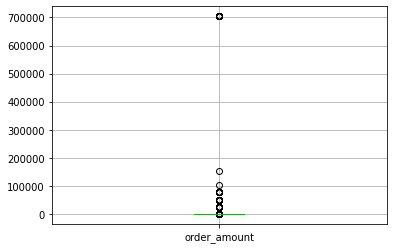

In [6]:
#average order value vs median order value

box_plot = df.boxplot(column=['order_amount'])
box_plot.plot()
plt.show()

#df = df.sort_values(by=['order_amount'], ascending=False)
#display(df.iloc[2500])

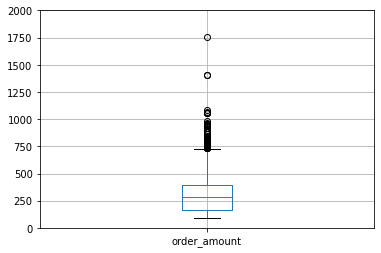

In [10]:
box_plot = df.boxplot(column=['order_amount'])
box_plot.plot()
plt.ylim(0, 2000)
plt.show()


## B)
A better metric to report for this dataset is the percentiles point. That way we get a better idea of the dataset a whole as well as the distribution of data. We will specifcally look at the 50 percentile point (median value) to get a better a average point (without influence of outliers).

In part C we consider the following percentile points:min, 25%, 50%, 75%, 95%, max

##C)

In [11]:
df['order_amount'].describe(percentiles=[0.25, 0.5, 0.75, 0.95])


count      5000.000000
mean       3145.128000
std       41282.539349
min          90.000000
25%         163.000000
50%         284.000000
75%         390.000000
95%         640.000000
max      704000.000000
Name: order_amount, dtype: float64

Median value of 284 seen above is a more resonable value and make more sense than the AOV of $3145.13 (mean). For this report consider the percentile points presented above.

## Question 2:
## A)


``` sql
SELECT ShipperName, COUNT(*) AS OrdersShipped 
FROM [Orders] LEFT JOIN [Shippers] on Orders.ShipperID = Shippers.ShipperID
WHERE ShipperName = "Speedy Express"
```









Output is as follows: 54
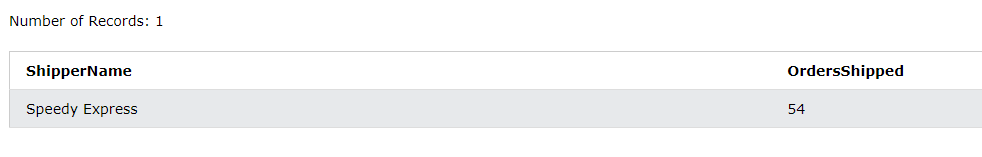

##B)


``` sql
SELECT LastName, Employees.EmployeeID, count (*) as NumOfOrders
FROM [Orders] left join [Employees] on Orders.EmployeeID = Employees.EmployeeID
group by Employees.EmployeeID
Order by NumOfOrders DESC
Limit 1
```

Output is as follows: Peacock
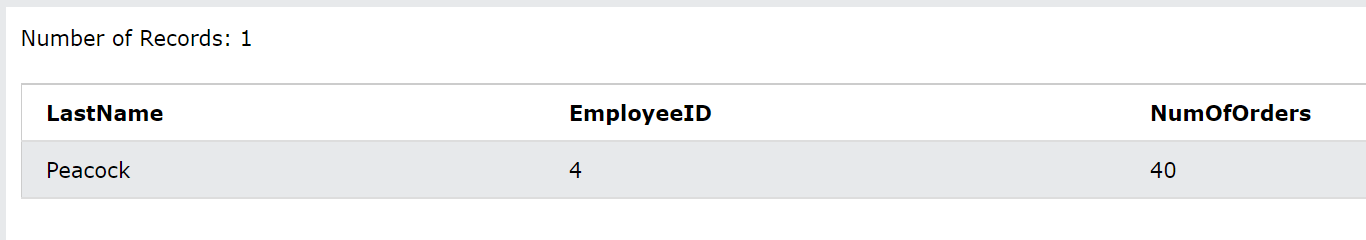

```sql
SELECT ProductName, OrderDetails.ProductID, SUM(Quantity) as TotalQuantity, Country 
FROM [OrderDetails] left join [Orders] on OrderDetails.OrderID = Orders.OrderID  left join Products on OrderDetails.ProductID =Products.ProductID 
left join Customers on Orders.CustomerID = Customers.CustomerID
where Country = "Germany"
Group by OrderDetails.ProductID
Order by TotalQuantity DESC
limit 1
```

Output as follows: Boston Crab Meat
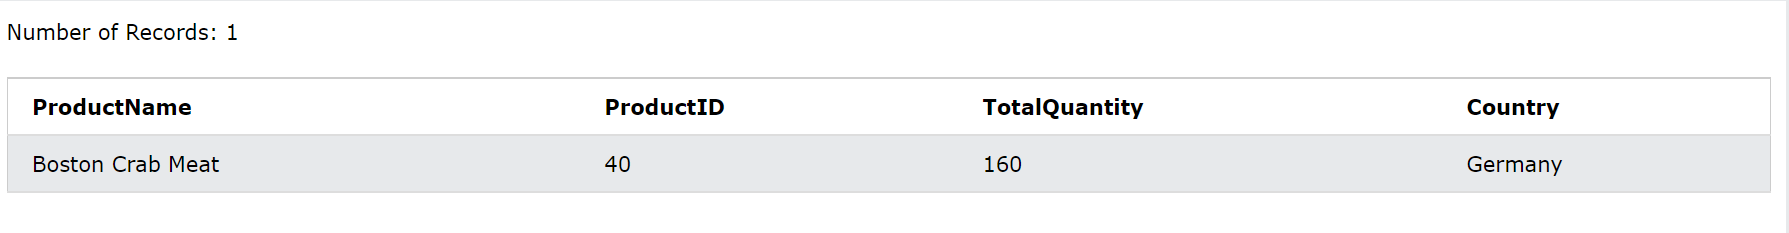